In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Looking at how much data there are avalaible, considering using py4mpi or something so that I could do this in paralel . 
http://darksky.slac.stanford.edu/scivis2015/data/ds14_scivis_0128/

In [8]:
cd 11_03_good_data/

[Errno 2] No such file or directory: '11_03_good_data/'
/global/project/projectdirs/astro250/doris/halo/halo_find/11_03_good_data


In [9]:
import glob
densities=[]
for i in glob.glob("density*.txt"):
    dens = np.loadtxt(i)
    densities.append(mean(dens))

//anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:823: UserWarning: loadtxt: Empty input file: "density1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
//anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
//anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:71: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [10]:
densities

[nan, 1.9289851108992719e-29, 3.1282995586749059e-29, 4.4194882083255241e-29]

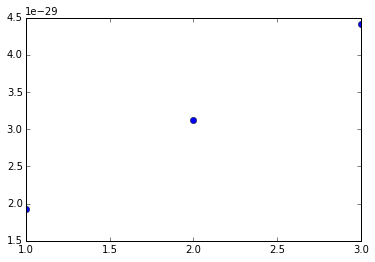

In [12]:
plt.plot(densities,'o')

In [14]:
cd ..

/global/project/projectdirs/astro250/doris/halo/halo_find


In [16]:
import numpy as np
import yt
import sklearn
yt.funcs.mylog.setLevel(50)
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cross_validation import cross_val_score
from sklearn.cluster import KMeans
from sklearn.grid_search import GridSearchCV
DEBUG= True
def debug(s,n=""):
    if DEBUG:
        print s , n
debug("Loading Particle Data")
ds = yt.load("../ds14_scivis_0128_e4_dt04_1.0000")
ad = ds.all_data()
x = ad[("all","particle_position_x")]
y = ad[("all","particle_position_y")]
z = ad[("all","particle_position_z")]
debug("Creating train test split samples")
m = ad[("all","mass")]
idx = ad[("all","particle_index")]

Loading Particle Data 
Creating train test split samples 


In [31]:
#note that x, y z is now in whatever weird code units the simulation was done in 
train = np.array([idx,m,x,y,z]).T
print shape(train)
print train

(2097152, 5)
[[  1.19876300e+06   2.75491975e+43  -4.48418516e+04  -4.47363750e+04
   -4.46098398e+04]
 [  1.19874800e+06   2.75491975e+43  -4.53840234e+04  -4.39328984e+04
   -4.49943320e+04]
 [  1.19878100e+06   2.75491975e+43  -4.35777617e+04  -4.35558203e+04
   -4.53993438e+04]
 ..., 
 [  1.19873200e+06   2.75491975e+43   4.38594219e+04   4.27085273e+04
    4.50836797e+04]
 [  1.19635900e+06   2.75491975e+43   4.41707383e+04   4.28891562e+04
    4.40927578e+04]
 [  1.19873400e+06   2.75491975e+43   4.44668516e+04   4.47076719e+04
    4.54055234e+04]]


In [32]:
train=[]
N =50
for n in np.arange(N):
    train.append([idx[n],m[n].in_cgs(),x[n].in_cgs(),y[n].in_cgs(),z[n].in_cgs()])
train = np.array(train)
print shape(train)
print train

(50, 5)
[[  1.19876300e+06   2.75491975e+43  -1.38367496e+26  -1.38042029e+26
   -1.37651583e+26]
 [  1.19874800e+06   2.75491975e+43  -1.40040464e+26  -1.35562760e+26
   -1.38838002e+26]
 [  1.19878100e+06   2.75491975e+43  -1.34466922e+26  -1.34399218e+26
   -1.40087737e+26]
 [  1.19876700e+06   2.75491975e+43  -1.34392842e+26  -1.34568991e+26
   -1.40143496e+26]
 [  1.19877700e+06   2.75491975e+43  -1.34658885e+26  -1.34312723e+26
   -1.40032629e+26]
 [  1.19882200e+06   2.75491975e+43  -1.37343389e+26  -1.38481305e+26
   -1.32505082e+26]
 [  1.19904200e+06   2.75491975e+43  -1.32636573e+26  -1.37790342e+26
   -1.34148676e+26]
 [  1.19883200e+06   2.75491975e+43  -1.39630334e+26  -1.35218225e+26
   -1.31409811e+26]
 [  7.39000000e+02   2.75491975e+43  -1.32036276e+26  -1.33762677e+26
   -1.35225915e+26]
 [  1.19883600e+06   2.75491975e+43  -1.35305166e+26  -1.31660474e+26
   -1.34038495e+26]
 [  1.19898900e+06   2.75491975e+43  -1.30063624e+26  -1.38909334e+26
   -1.39384902e+26]
 [

woah I cant believe I did this , this is so dumb. slowed down the data loadup by at least half a day...

### n_job parallel job 

In [34]:
k_range = np.arange(1,1048576,100)
print k_range

[      1     101     201 ..., 1048301 1048401 1048501]


Testing this on debug queus 

In [ ]:
cd /project/projectdirs/astro250/doris/halo/halo_find
aprun -n 24 /global/homes/d/dorislee/anaconda/bin/python parallel_gs_dens.py

In [35]:
1048576/2

524288

Just doing a quarter of the dataset for now

In [40]:
len(np.arange(1000,500000,10000))

50

In [44]:
np.arange(1000,20000,1000)

array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
       10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000])

Adding timing information

In [ ]:
N =200# 50000
train = np.array([idx[N:],m[N:],x[N:],y[N:],z[N:]]).T
np.savetxt("train.txt",train)
# Explicit Grid Search
k_range =np.arange(1,5)

In [ ]:
Loading Particle Data
Creating train test split samples
1 clusters test
Time:  22.1057710648
2 clusters test
Time:  63.2564339638
3 clusters test
Time:  64.1353271008
4 clusters test
Time:  64.5388610363

In [ ]:
1               22.1057710648
2               63.2564339638
3               64.1353271008
4               64.5388610363

The program that I am running can actually be made to be embarassingly parallel since each k from the krange is independet of each other and doesn't really require result from other placees, so many can write a script that submits many smaller jobs . The only associated cost of doing this is the k times overhead per script to load particle data but it should not be that bad compared to the simultaneity that the embarassingly parallel approach yields. '

In [45]:
np.arange(100,2000,100)

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900])

But in the serial queus the vmem maximum is 20GB so I could only submit jobs that are smaller 

In [48]:
np.arange(50,501,50)

array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])

In [1]:
pwd

u'/global/project/projectdirs/astro250/doris/halo/halo_find'

In [29]:
import glob
densities=[]
for i in glob.glob("density*.txt"):
    dens = np.loadtxt(i)
    densities.append(mean(dens))

In [30]:
k_range =np.arange(50,501,50)
print k_range

[ 50 100 150 200 250 300 350 400 450 500]


In [14]:
densities

[4.0592675700423913e+35,
 5.8403393051140855e+35,
 7.2064966284176567e+35,
 9.052533851530664e+35,
 1.0624088591226459e+36,
 1.4090765833589804e+36]

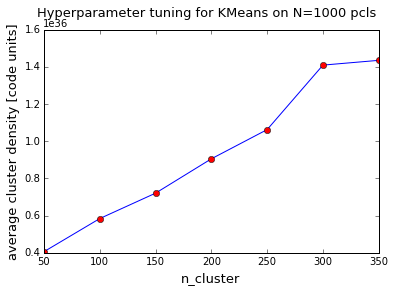

In [32]:
plt.plot(k_range[:7],densities)
plt.plot(k_range[:7],densities,'o',color="red")
plt.suptitle("Hyperparameter tuning for KMeans on N=1000 pcls ",fontsize=13)
plt.xlabel("n_cluster",fontsize=13)
plt.ylabel("average cluster density [code units]",fontsize=13)

Still need to run 400 and 450